In [12]:
from pathlib import Path
import pydicom
import matplotlib.pyplot as plt

In [5]:
dicom_file = pydicom.dcmread('../setup/AI-IN-MEDICAL-MATERIALS_NEW/AI-IN-MEDICAL-MATERIALS/03-Data-Formats/ID_0000_AGE_0060_CONTRAST_1_CT.dcm')

In [6]:
print(dicom_file)

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 194
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.108821836759549281694712274169
(0002,0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002,0013) Implementation Version Name         SH: 'dcm4che-1.4.31'
-------------------------------------------------
(0008,0000) Group Length                        UL: 430
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008,0016) SOP Class UID                       UI: CT Image Storage
(0008,0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.1088218367595492

In [7]:
dicom_file[0x0028, 0x0010]

(0028,0010) Rows                                US: 512

In [8]:
dicom_file.Rows

512

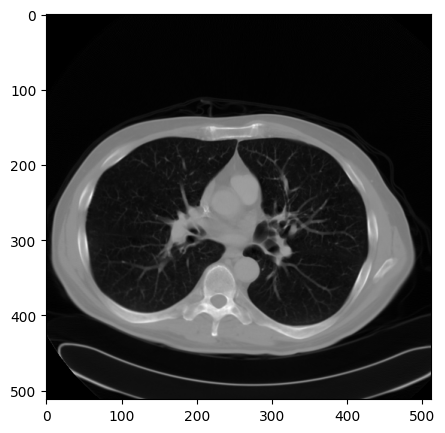

In [10]:
ct = dicom_file.pixel_array
plt.figure(figsize=(5, 5))
plt.imshow(ct, cmap='gray')

In [14]:
path_to_head_mri = Path('../setup/AI-IN-MEDICAL-MATERIALS_NEW/AI-IN-MEDICAL-MATERIALS/03-Data-Formats/SE000001/')
path_to_head_mri

WindowsPath('../setup/AI-IN-MEDICAL-MATERIALS_NEW/AI-IN-MEDICAL-MATERIALS/03-Data-Formats/SE000001')

In [16]:
all_files = list(path_to_head_mri.glob('*'))
all_files

[WindowsPath('../setup/AI-IN-MEDICAL-MATERIALS_NEW/AI-IN-MEDICAL-MATERIALS/03-Data-Formats/SE000001/MR000000'),
 WindowsPath('../setup/AI-IN-MEDICAL-MATERIALS_NEW/AI-IN-MEDICAL-MATERIALS/03-Data-Formats/SE000001/MR000001'),
 WindowsPath('../setup/AI-IN-MEDICAL-MATERIALS_NEW/AI-IN-MEDICAL-MATERIALS/03-Data-Formats/SE000001/MR000002'),
 WindowsPath('../setup/AI-IN-MEDICAL-MATERIALS_NEW/AI-IN-MEDICAL-MATERIALS/03-Data-Formats/SE000001/MR000003'),
 WindowsPath('../setup/AI-IN-MEDICAL-MATERIALS_NEW/AI-IN-MEDICAL-MATERIALS/03-Data-Formats/SE000001/MR000004'),
 WindowsPath('../setup/AI-IN-MEDICAL-MATERIALS_NEW/AI-IN-MEDICAL-MATERIALS/03-Data-Formats/SE000001/MR000005'),
 WindowsPath('../setup/AI-IN-MEDICAL-MATERIALS_NEW/AI-IN-MEDICAL-MATERIALS/03-Data-Formats/SE000001/MR000006'),
 WindowsPath('../setup/AI-IN-MEDICAL-MATERIALS_NEW/AI-IN-MEDICAL-MATERIALS/03-Data-Formats/SE000001/MR000007'),
 WindowsPath('../setup/AI-IN-MEDICAL-MATERIALS_NEW/AI-IN-MEDICAL-MATERIALS/03-Data-Formats/SE000001/MR00

In [22]:
mri_data = []

for path in all_files:
    data = pydicom.dcmread(path)
    mri_data.append(data)

In [23]:
for slice in mri_data:
    print(slice.SliceLocation)

0.0
5.99999663091323
11.9999973042441
17.9999979772582
23.9999946081714
29.9999952815023
35.9999959546749
41.9999963629367
47.9999970362677
53.9999958207213
59.9999962290673
65.9999961939969
71.9999961590453
77.9999962275740
83.9999967682912
89.9999955528687
95.9999960937442
101.999994745866
107.999995419197
113.999995959439
119.999996566542
125.999997173645
131.999997780749
137.999998321624
143.999998928727
149.999999502083
155.999992554172


In [26]:
mri_data_ordered = sorted(mri_data, key=lambda slice: slice.SliceLocation) # put the data in the right order
for slice in mri_data_ordered:
    print(slice.SliceLocation)


# # Same as
# Define a function to get the SliceLocation attribute
# def get_slice_location(slice):
#     return slice.SliceLocation

# # Sort the MRI data using the named function
# mri_data_ordered = sorted(mri_data, key=get_slice_location) # put the data in the right order

# # Print the SliceLocation of each slice
# for slice in mri_data_ordered:
#     print(slice.SliceLocation)

0.0
5.99999663091323
11.9999973042441
17.9999979772582
23.9999946081714
29.9999952815023
35.9999959546749
41.9999963629367
47.9999970362677
53.9999958207213
59.9999962290673
65.9999961939969
71.9999961590453
77.9999962275740
83.9999967682912
89.9999955528687
95.9999960937442
101.999994745866
107.999995419197
113.999995959439
119.999996566542
125.999997173645
131.999997780749
137.999998321624
143.999998928727
149.999999502083
155.999992554172


In [27]:
full_volume = []
for slice in mri_data_ordered:
    full_volume.append(slice.pixel_array)

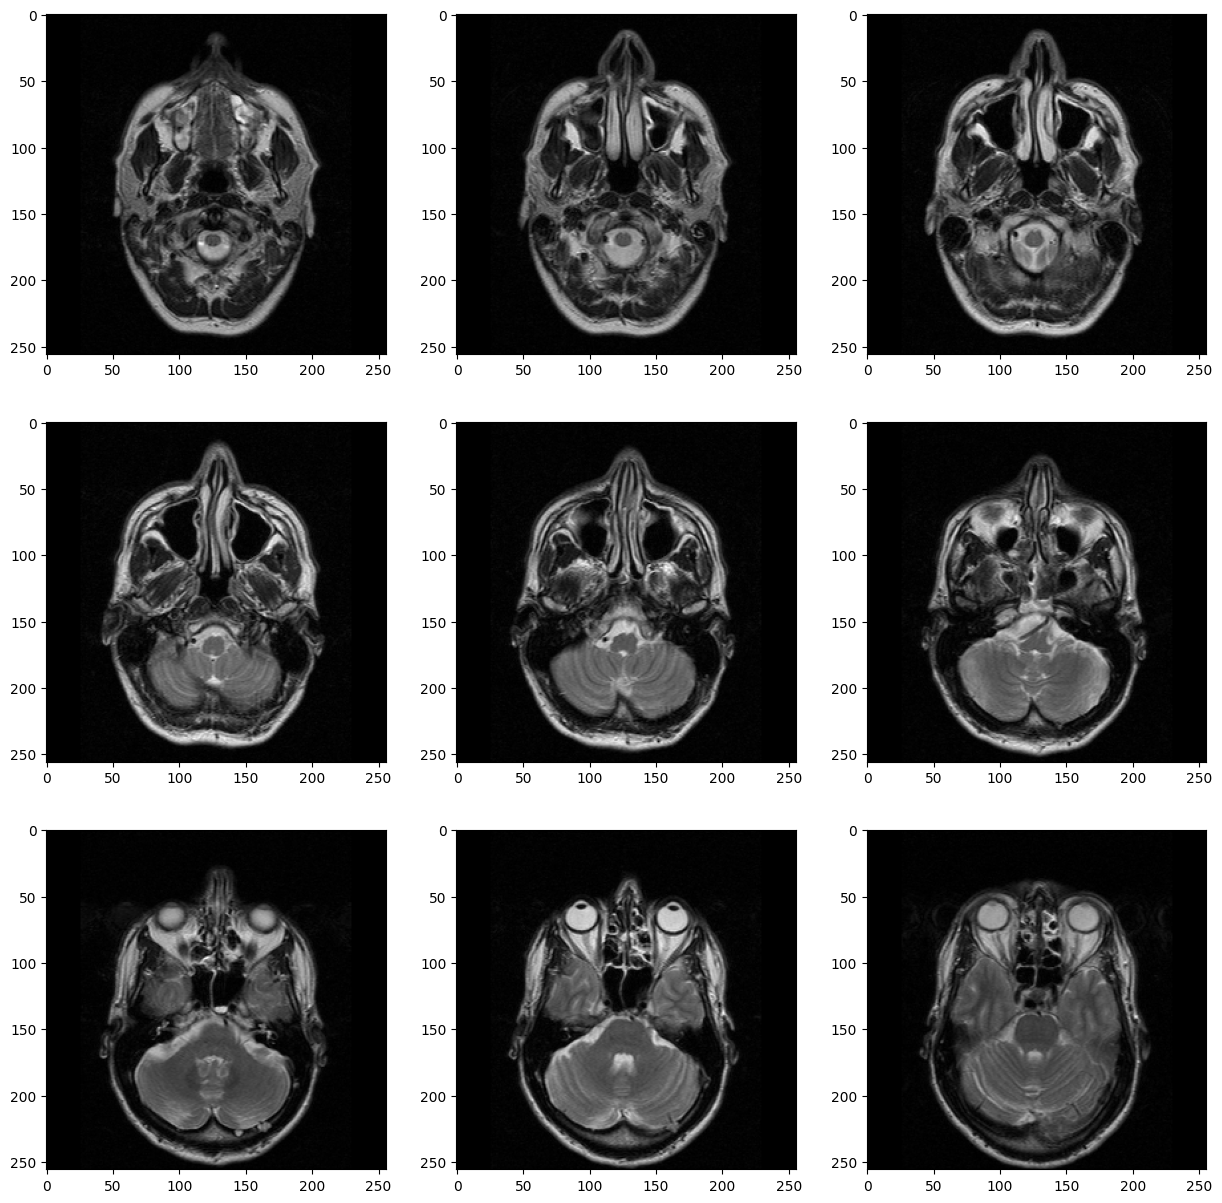

In [29]:
fig, axis = plt.subplots(3,3, figsize=(15,15))
slice_counter = 0
for i in range(3):
    for j in range(3):
        axis[i,j].imshow(full_volume[slice_counter], cmap='gray')
        # axis[i,j].axis('off')
        slice_counter += 1

In [31]:
import SimpleITK as sitk

In [32]:
series_ids = sitk.ImageSeriesReader.GetGDCMSeriesIDs(str(path_to_head_mri))
series_ids

('1.3.46.670589.11.0.0.11.4.2.0.12098.5.4500.2015011413262801702',)

In [33]:
series_file_names = sitk.ImageSeriesReader.GetGDCMSeriesFileNames(str(path_to_head_mri), series_ids[0])
series_file_names

('..\\setup\\AI-IN-MEDICAL-MATERIALS_NEW\\AI-IN-MEDICAL-MATERIALS\\03-Data-Formats\\SE000001/MR000000',
 '..\\setup\\AI-IN-MEDICAL-MATERIALS_NEW\\AI-IN-MEDICAL-MATERIALS\\03-Data-Formats\\SE000001/MR000001',
 '..\\setup\\AI-IN-MEDICAL-MATERIALS_NEW\\AI-IN-MEDICAL-MATERIALS\\03-Data-Formats\\SE000001/MR000002',
 '..\\setup\\AI-IN-MEDICAL-MATERIALS_NEW\\AI-IN-MEDICAL-MATERIALS\\03-Data-Formats\\SE000001/MR000003',
 '..\\setup\\AI-IN-MEDICAL-MATERIALS_NEW\\AI-IN-MEDICAL-MATERIALS\\03-Data-Formats\\SE000001/MR000004',
 '..\\setup\\AI-IN-MEDICAL-MATERIALS_NEW\\AI-IN-MEDICAL-MATERIALS\\03-Data-Formats\\SE000001/MR000005',
 '..\\setup\\AI-IN-MEDICAL-MATERIALS_NEW\\AI-IN-MEDICAL-MATERIALS\\03-Data-Formats\\SE000001/MR000006',
 '..\\setup\\AI-IN-MEDICAL-MATERIALS_NEW\\AI-IN-MEDICAL-MATERIALS\\03-Data-Formats\\SE000001/MR000007',
 '..\\setup\\AI-IN-MEDICAL-MATERIALS_NEW\\AI-IN-MEDICAL-MATERIALS\\03-Data-Formats\\SE000001/MR000008',
 '..\\setup\\AI-IN-MEDICAL-MATERIALS_NEW\\AI-IN-MEDICAL-MATERIAL

In [34]:
series_reader = sitk.ImageSeriesReader()
series_reader.SetFileNames(series_file_names)

In [35]:
image_data = series_reader.Execute()
image_data.GetSize()

(256, 256, 27)

In [36]:
head_mri = sitk.GetArrayFromImage(image_data)
head_mri.shape

(27, 256, 256)

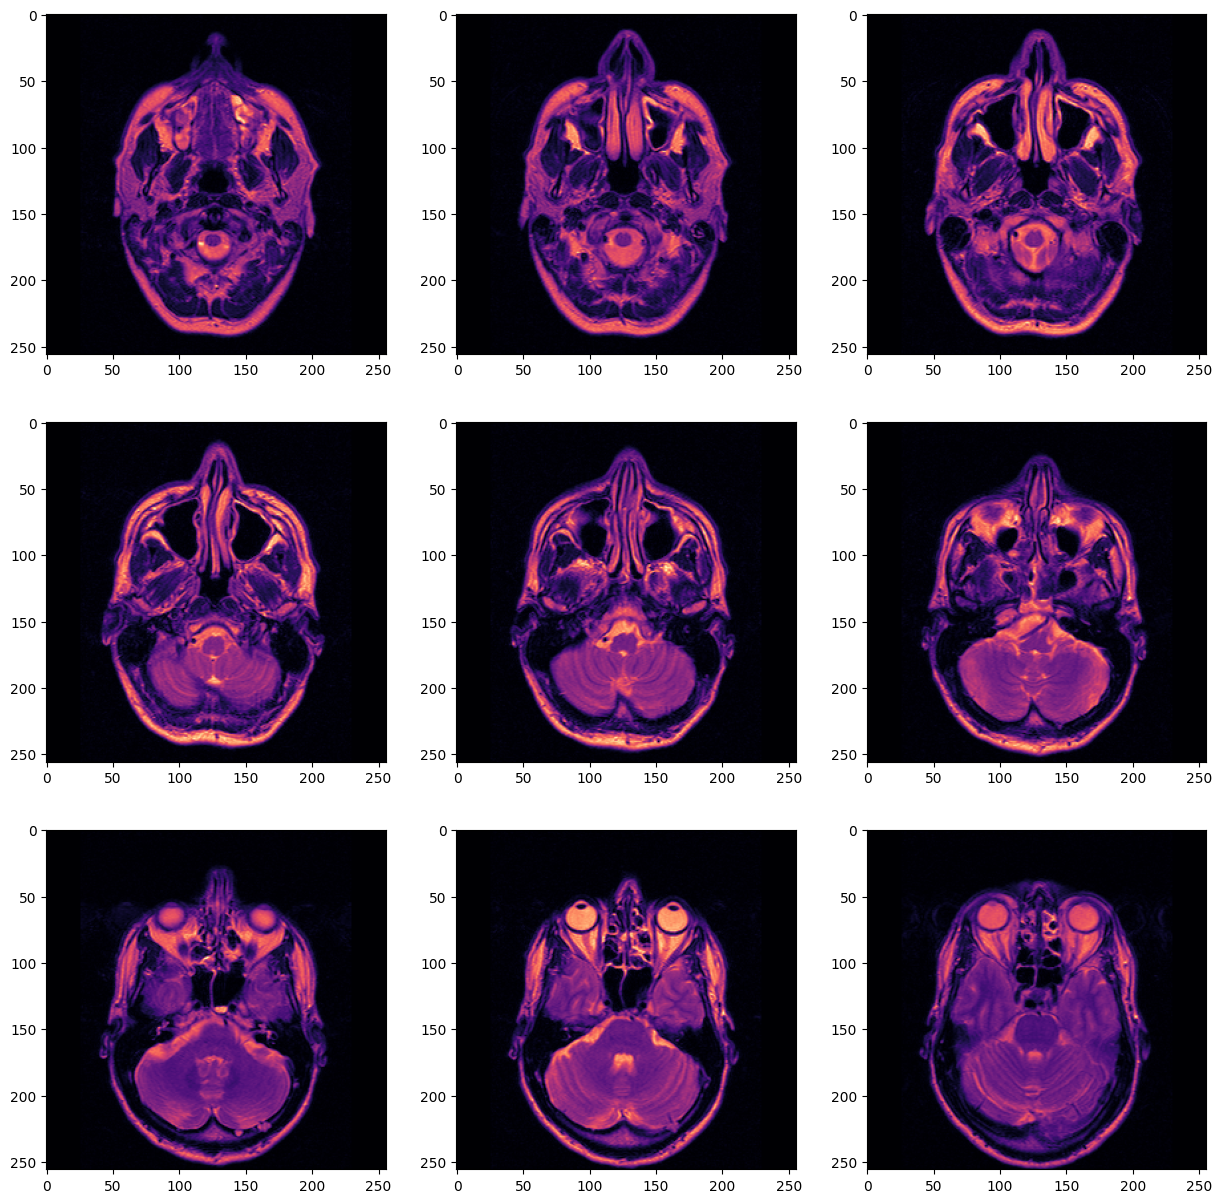

In [38]:
fig, axis = plt.subplots(3,3, figsize=(15,15))
slice_counter = 0
for i in range(3):
    for j in range(3):
        axis[i,j].imshow(head_mri[slice_counter], cmap='magma')
        # axis[i,j].axis('off')
        slice_counter += 1